In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel


In [2]:
file_paths = [
    'emissions_high_granularity.csv',
    'emissions_medium_granularity.csv',
    'emissions_low_granularity.csv'
]

In [3]:
data_frames=[pd.read_csv(file) for file in file_paths]
data_high, data_medium, data_low = data_frames

In [4]:
print(data_high.head())
print(data_high.info())
print(data_high.describe())

   year                   parent_entity         parent_type reporting_entity  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
1  1963  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
2  1964  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
3  1965  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   
4  1966  Abu Dhabi National Oil Company  State-owned Entity        Abu Dhabi   

   commodity  production_value production_unit  product_emissions_MtCO2  \
0  Oil & NGL            0.9125  Million bbl/yr                 0.338928   
1  Oil & NGL            1.8250  Million bbl/yr                 0.677855   
2  Oil & NGL            7.3000  Million bbl/yr                 2.711422   
3  Oil & NGL           10.9500  Million bbl/yr                 4.067132   
4  Oil & NGL           13.5050  Million bbl/yr                 5.016130   

   flaring_emissions_MtCO2  venting_emissions_MtCO2  \
0            

In [5]:
print(data_medium.head())
print(data_medium.info())
print(data_medium.describe())

   year                   parent_entity         parent_type    commodity  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
1  1962  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
2  1963  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   
3  1963  Abu Dhabi National Oil Company  State-owned Entity  Natural Gas   
4  1964  Abu Dhabi National Oil Company  State-owned Entity    Oil & NGL   

   production_value production_unit  total_emissions_MtCO2e  
0           0.91250  Million bbl/yr                0.363885  
1           1.84325          Bcf/yr                0.134355  
2           1.82500  Million bbl/yr                0.727770  
3           4.42380          Bcf/yr                0.322453  
4           7.30000  Million bbl/yr                2.911079  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12551 entries, 0 to 12550
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  -----

In [6]:
print(data_low.head())
print(data_low.info())
print(data_low.describe())

   year                   parent_entity         parent_type  \
0  1962  Abu Dhabi National Oil Company  State-owned Entity   
1  1963  Abu Dhabi National Oil Company  State-owned Entity   
2  1964  Abu Dhabi National Oil Company  State-owned Entity   
3  1965  Abu Dhabi National Oil Company  State-owned Entity   
4  1966  Abu Dhabi National Oil Company  State-owned Entity   

   total_emissions_MtCO2e  
0                0.498240  
1                1.050222  
2                4.174018  
3                6.193849  
4                7.562050  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6069 entries, 0 to 6068
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    6069 non-null   int64  
 1   parent_entity           6069 non-null   object 
 2   parent_type             6069 non-null   object 
 3   total_emissions_MtCO2e  6069 non-null   float64
dtypes: float64(1), int64(1),

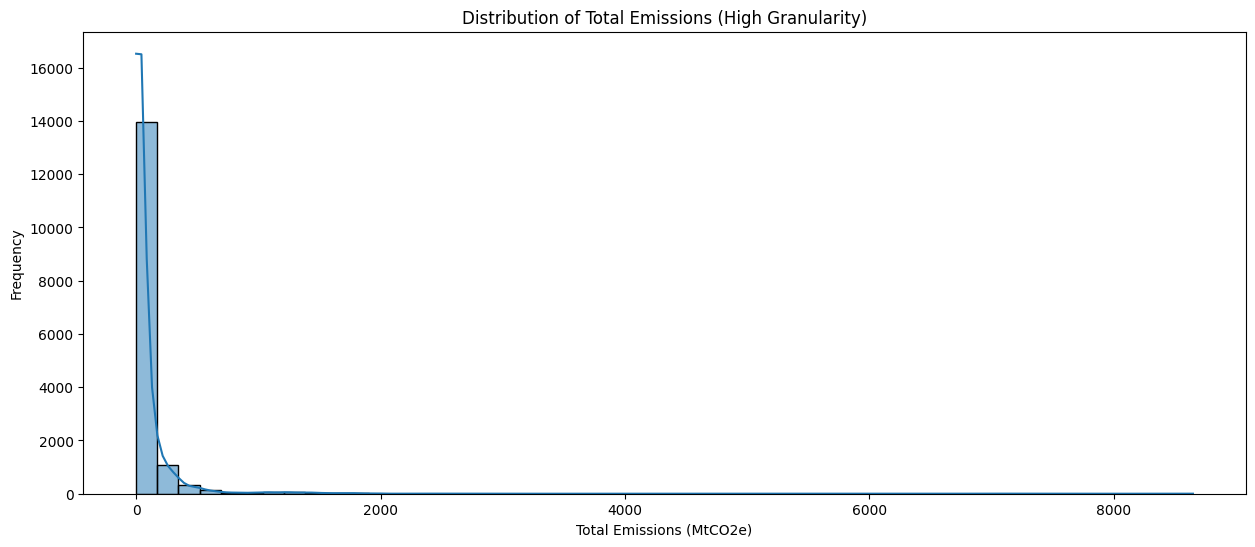

In [7]:
plt.figure(figsize=(15, 6))
sns.histplot(data_high['total_emissions_MtCO2e'], bins=50, kde=True)
plt.title('Distribution of Total Emissions (High Granularity)')
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.show()

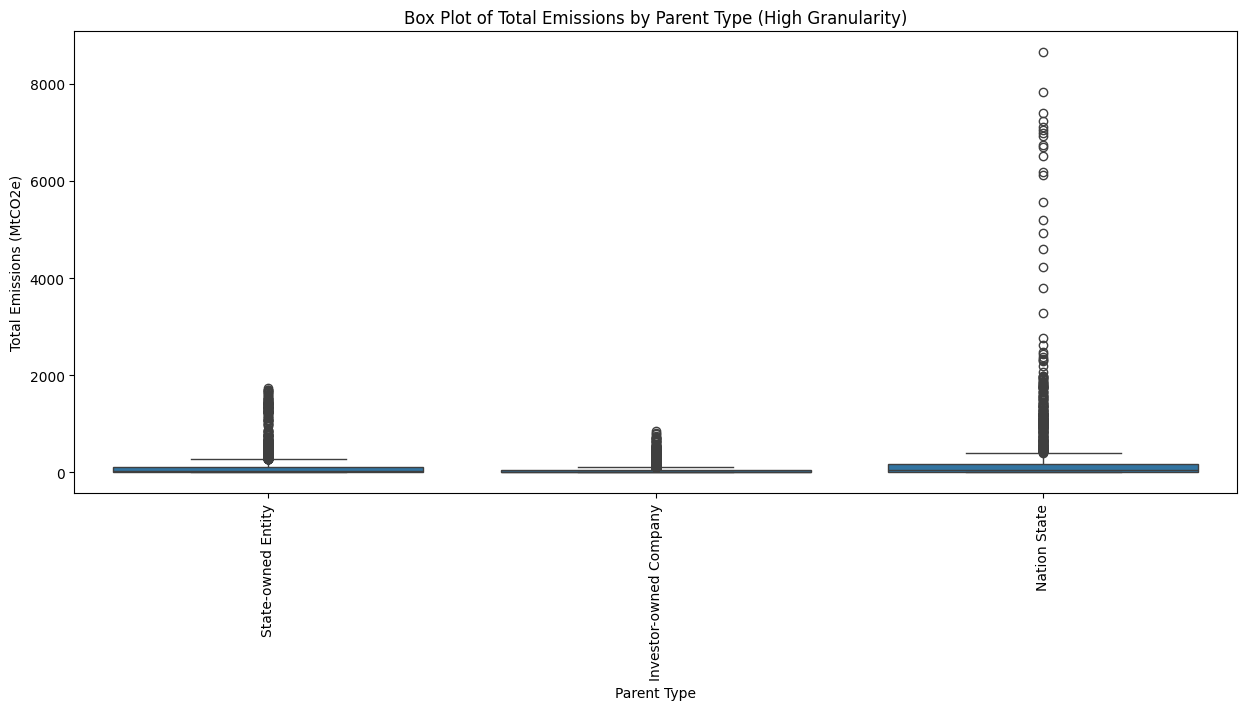

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='parent_type', y='total_emissions_MtCO2e', data=data_high)
plt.title('Box Plot of Total Emissions by Parent Type (High Granularity)')
plt.xlabel('Parent Type')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)
plt.show()

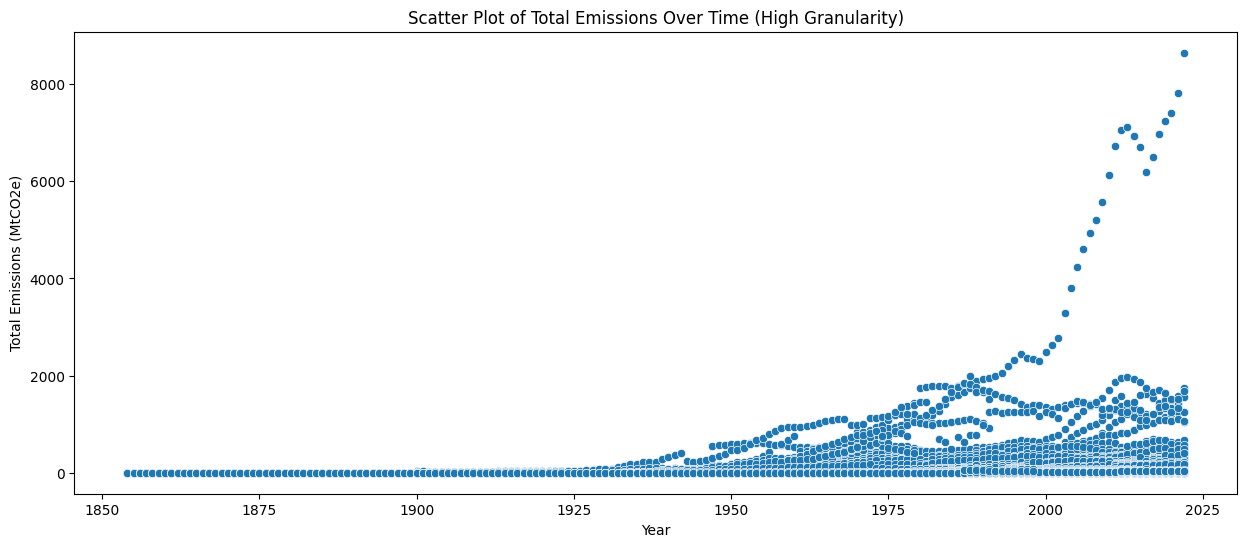

In [9]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='total_emissions_MtCO2e', data=data_high)
plt.title('Scatter Plot of Total Emissions Over Time (High Granularity)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

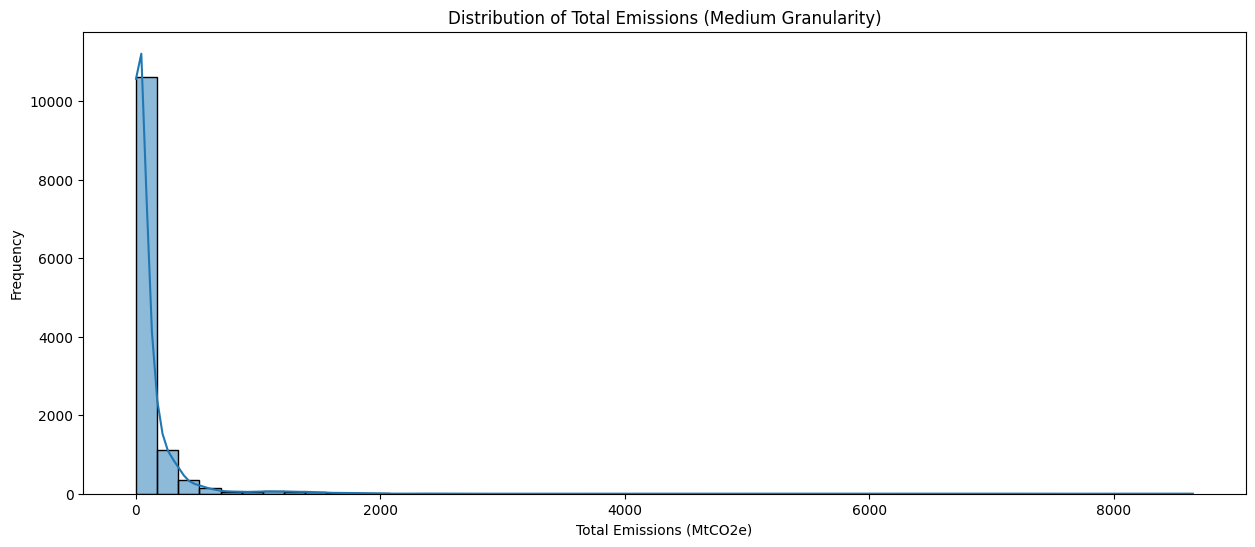

In [10]:
plt.figure(figsize=(15, 6))
sns.histplot(data_medium['total_emissions_MtCO2e'], bins=50, kde=True)
plt.title('Distribution of Total Emissions (Medium Granularity)')
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.show()

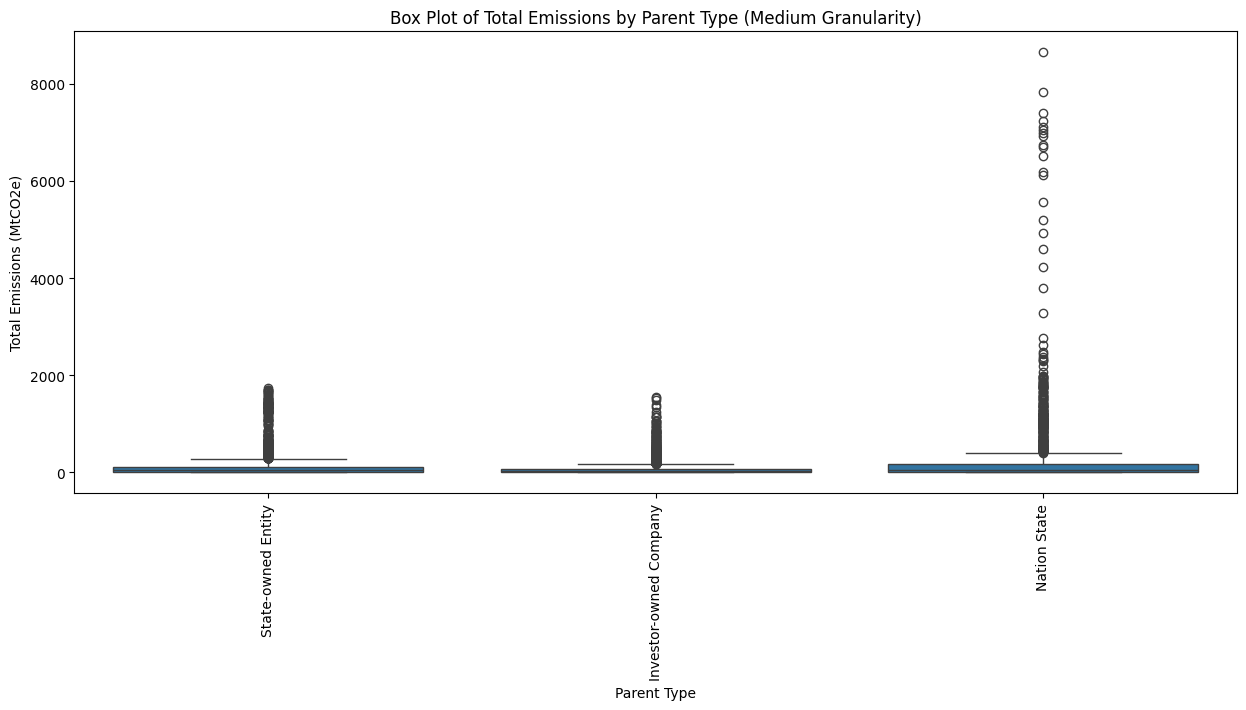

In [11]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='parent_type', y='total_emissions_MtCO2e', data=data_medium)
plt.title('Box Plot of Total Emissions by Parent Type (Medium Granularity)')
plt.xlabel('Parent Type')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)
plt.show()

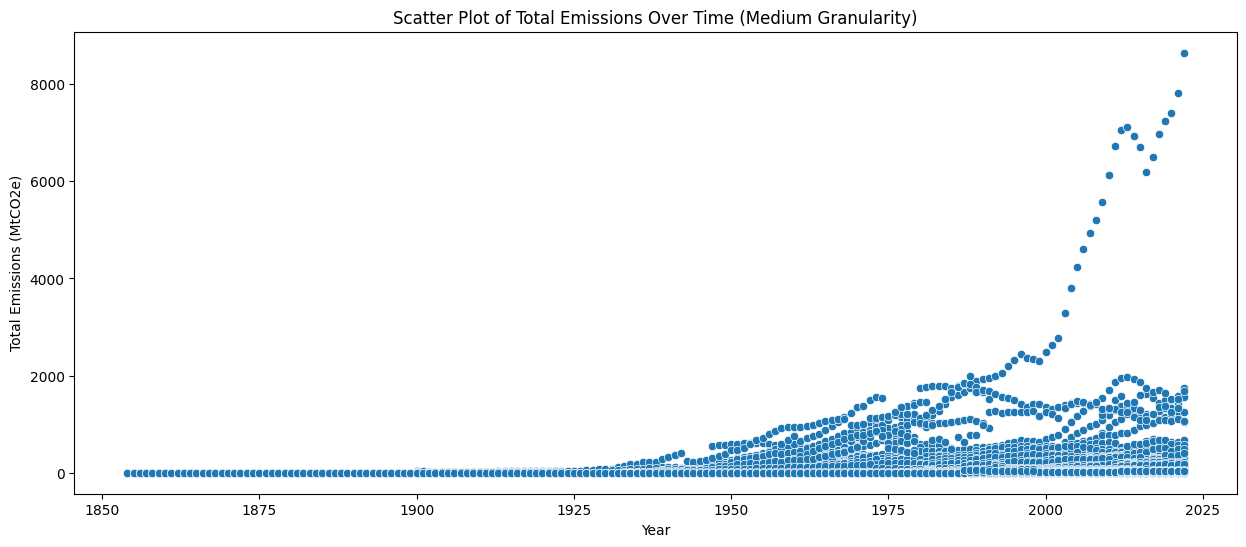

In [12]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='total_emissions_MtCO2e', data=data_medium)
plt.title('Scatter Plot of Total Emissions Over Time (Medium Granularity)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

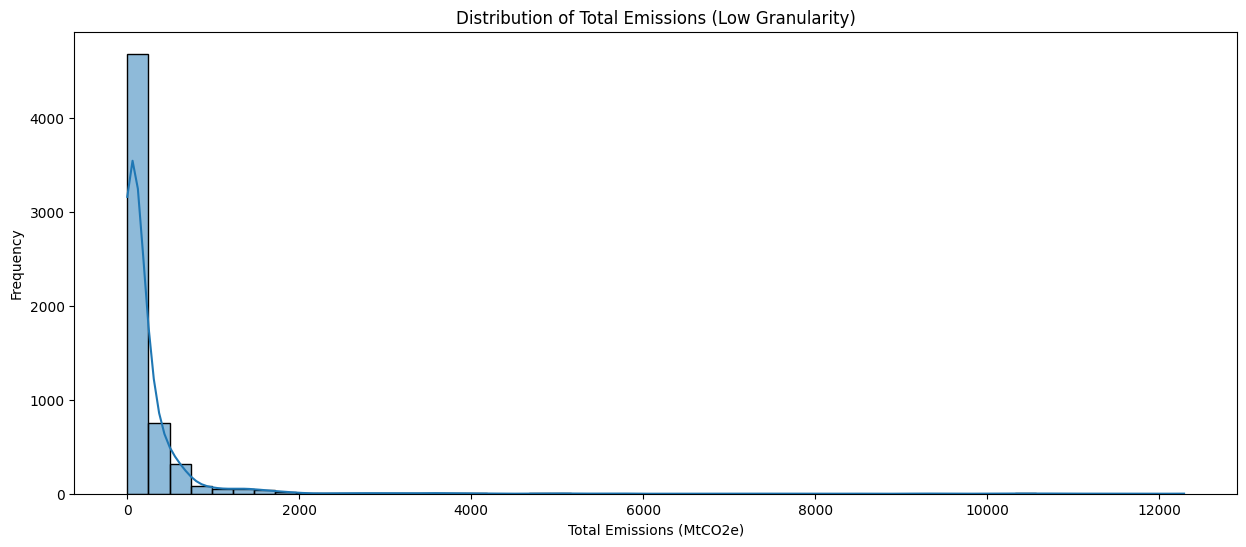

In [13]:
plt.figure(figsize=(15, 6))
sns.histplot(data_low['total_emissions_MtCO2e'], bins=50, kde=True)
plt.title('Distribution of Total Emissions (Low Granularity)')
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.show()

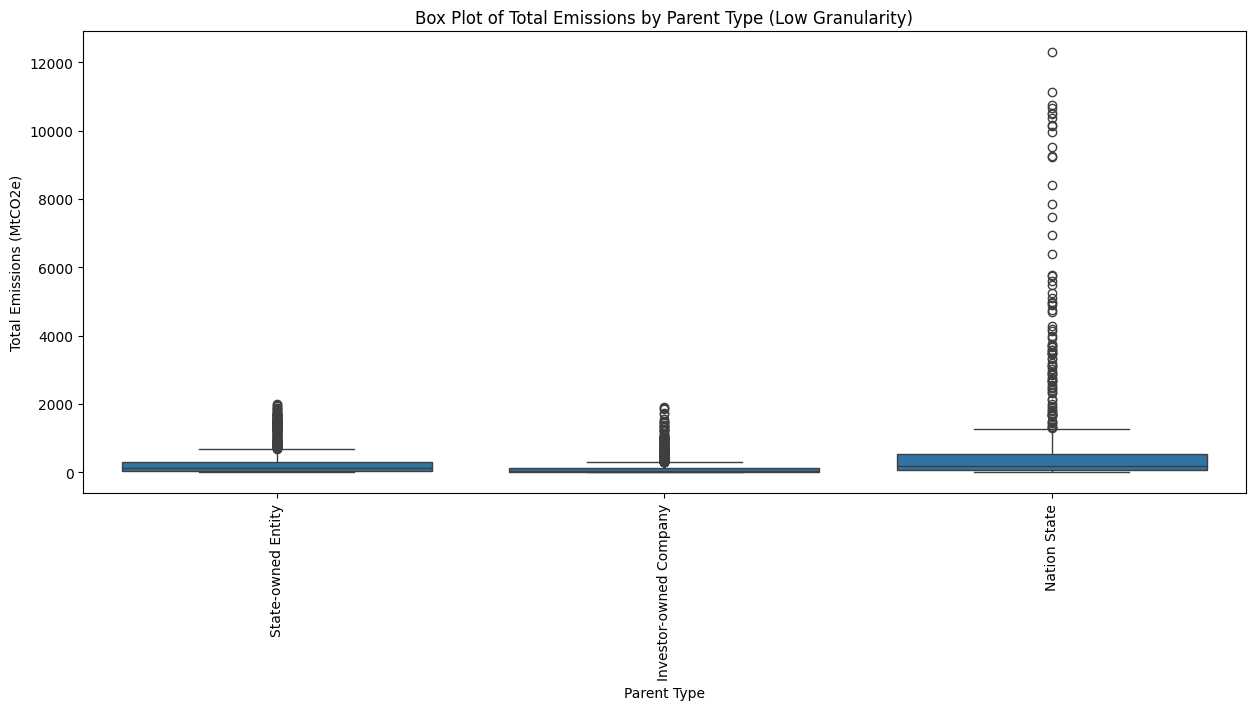

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='parent_type', y='total_emissions_MtCO2e', data=data_low)
plt.title('Box Plot of Total Emissions by Parent Type (Low Granularity)')
plt.xlabel('Parent Type')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)
plt.show()

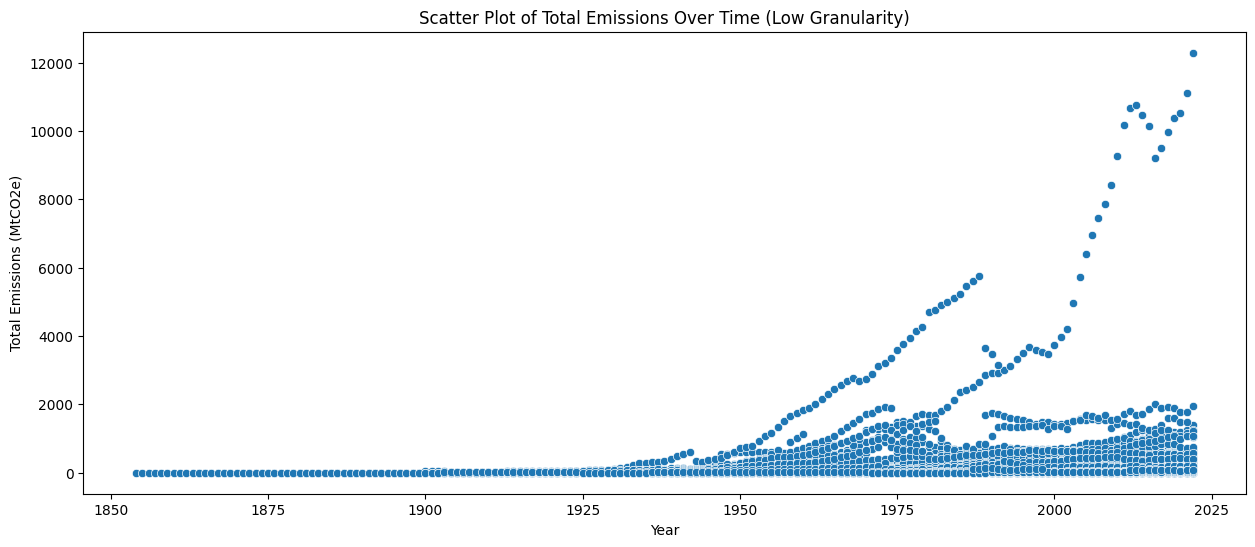

In [15]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='total_emissions_MtCO2e', data=data_low)
plt.title('Scatter Plot of Total Emissions Over Time (Low Granularity)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

In [16]:
combined_df = pd.concat(data_frames, ignore_index=True)

combined_df.dropna(inplace=True)
combined_df.drop_duplicates(inplace=True)

In [17]:
combined_df.drop(['parent_entity', 'reporting_entity', 'source'], axis=1, inplace=True)
combined_df = pd.get_dummies(combined_df, columns=['parent_type', 'commodity', 'production_unit'], drop_first=True)

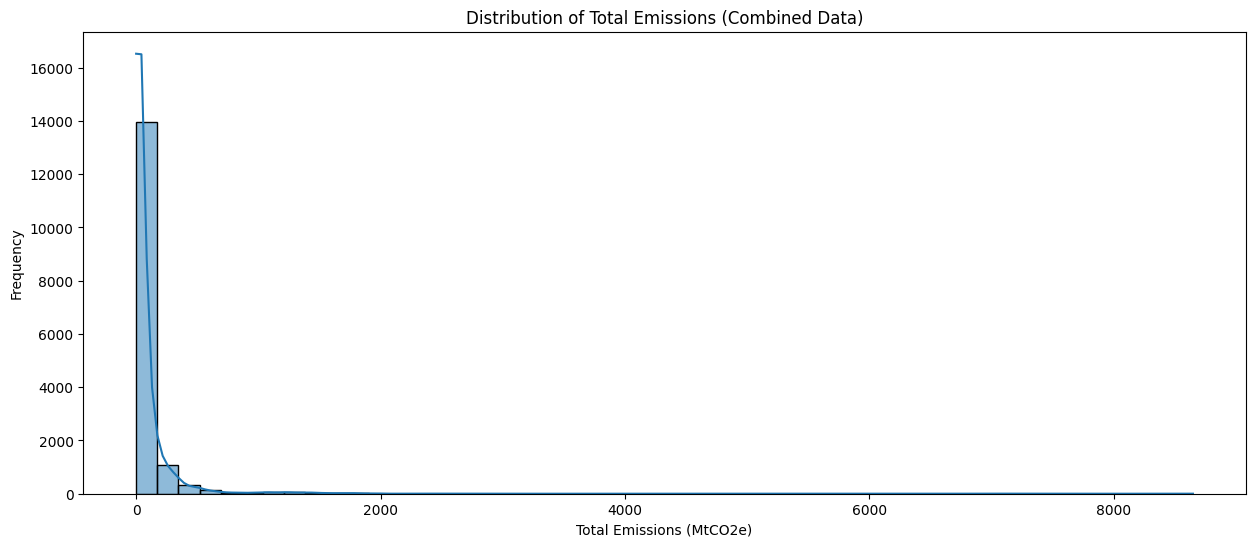

In [18]:
plt.figure(figsize=(15, 6))
sns.histplot(combined_df['total_emissions_MtCO2e'], bins=50, kde=True)
plt.title('Distribution of Total Emissions (Combined Data)')
plt.xlabel('Total Emissions (MtCO2e)')
plt.ylabel('Frequency')
plt.show()

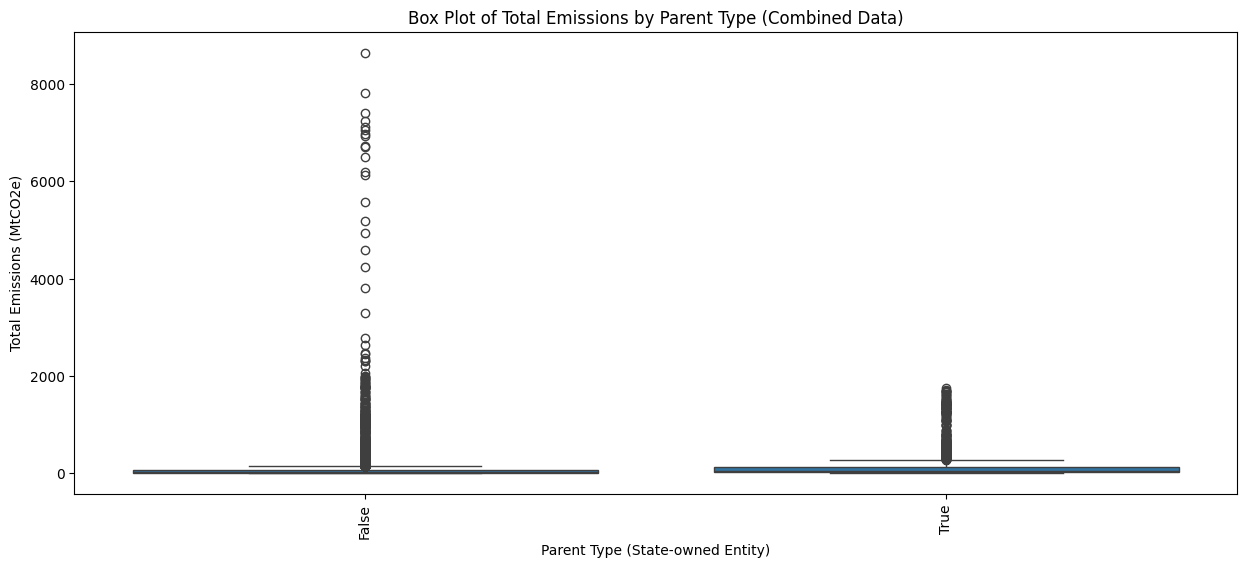

In [19]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='parent_type_State-owned Entity', y='total_emissions_MtCO2e', data=combined_df)
plt.title('Box Plot of Total Emissions by Parent Type (Combined Data)')
plt.xlabel('Parent Type (State-owned Entity)')
plt.ylabel('Total Emissions (MtCO2e)')
plt.xticks(rotation=90)
plt.show()

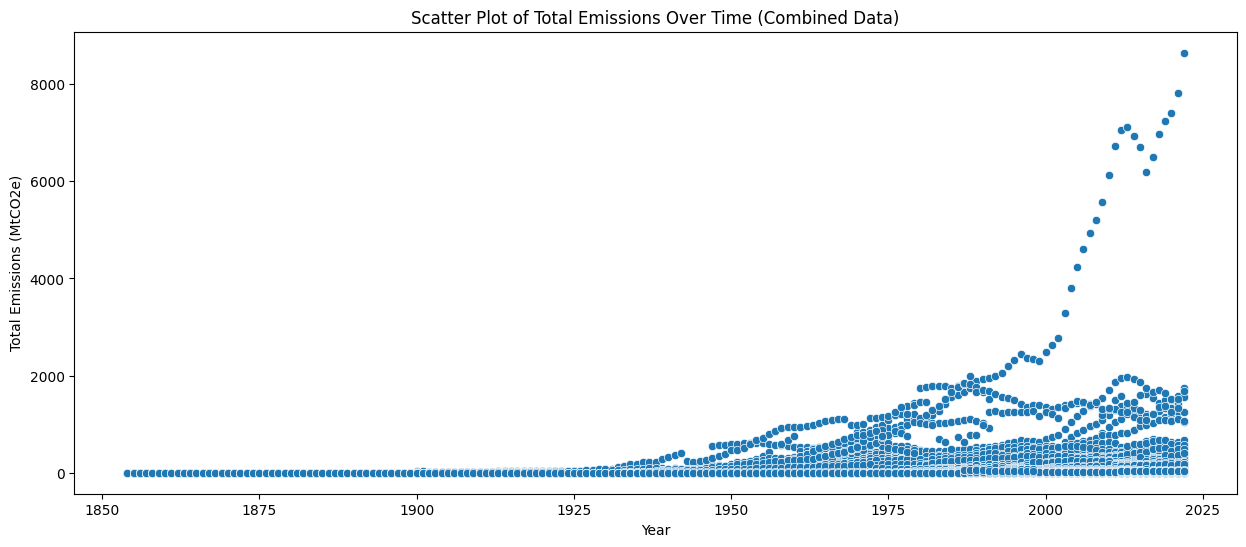

In [20]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='year', y='total_emissions_MtCO2e', data=combined_df)
plt.title('Scatter Plot of Total Emissions Over Time (Combined Data)')
plt.xlabel('Year')
plt.ylabel('Total Emissions (MtCO2e)')
plt.show()

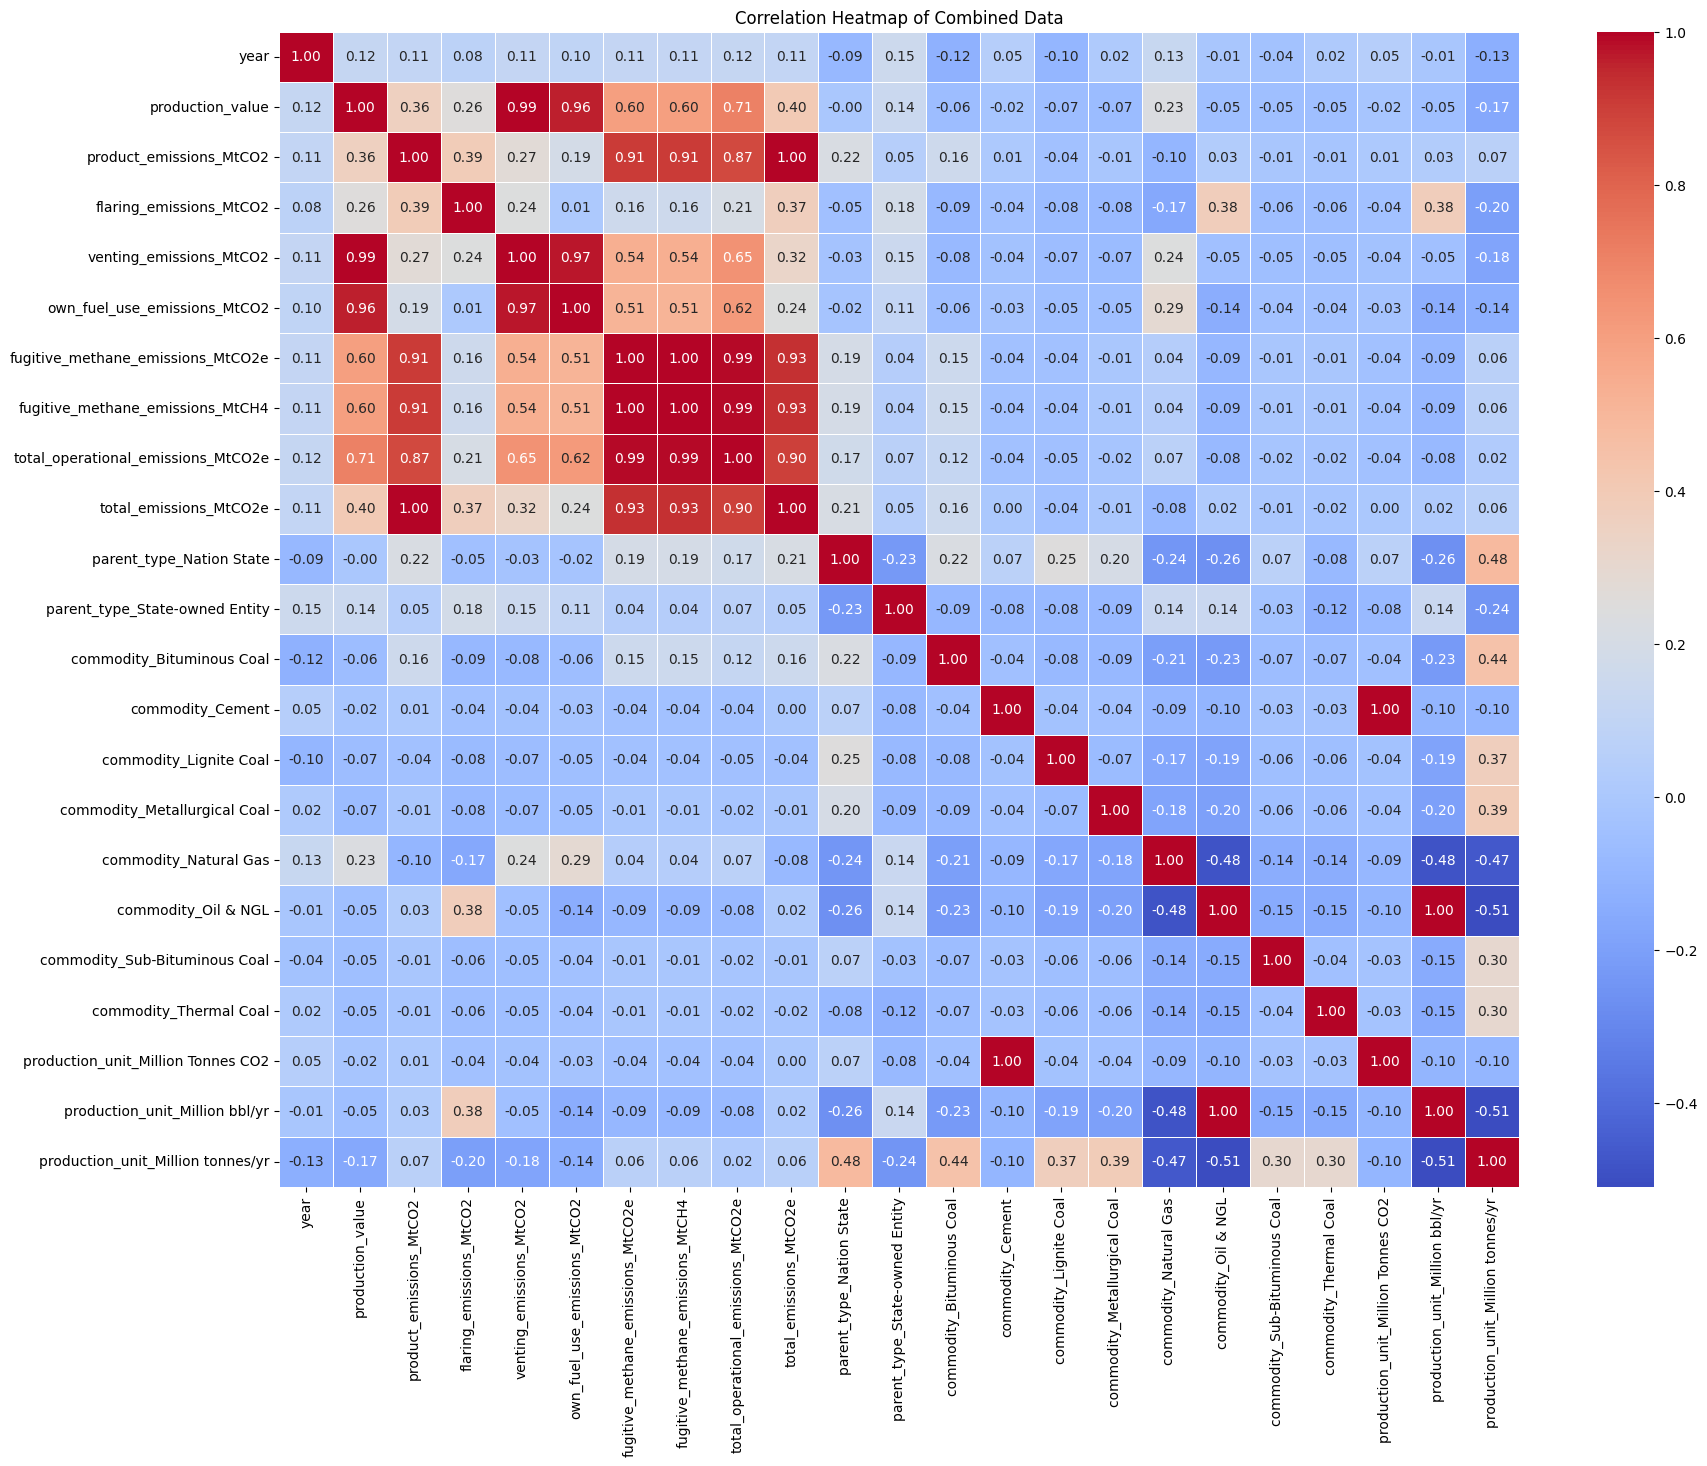

In [21]:
plt.figure(figsize=(20, 15))
correlation_matrix = combined_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Combined Data')
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
def feature_engineering(df):
    polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
    numeric_features = df.select_dtypes(include=['float64', 'int64']).drop('total_emissions_MtCO2e', axis=1)
    
    poly_features = polynomial_features.fit_transform(numeric_features)
    poly_feature_names = polynomial_features.get_feature_names_out(numeric_features.columns)
    
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df.index)
    final_df = pd.concat([df, poly_df], axis=1)
    
    return final_df

In [24]:
engineered_df = feature_engineering(combined_df)

In [25]:
X = engineered_df.drop('total_emissions_MtCO2e', axis=1)
y = engineered_df['total_emissions_MtCO2e']

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

In [31]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [32]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [33]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_linear, mae_rf],
    'MSE': [mse_linear, mse_rf],
    'RMSE': [rmse_linear, rmse_rf],
    'R2': [r2_linear, r2_rf]
})

In [34]:
print(results)

               Model           MAE           MSE          RMSE       R2
0  Linear Regression  2.127456e-13  2.038411e-25  4.514877e-13  1.00000
1      Random Forest  4.728563e-01  6.448994e+01  8.030563e+00  0.99879


In [36]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2: {r2}")
    print("\n")

In [37]:
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

Linear Regression Performance:
MAE: 2.1274555284433183e-13
MSE: 2.038410996428456e-25
RMSE: 4.5148765170583084e-13
R2: 1.0


Random Forest Performance:
MAE: 0.4728562666690747
MSE: 64.48993600661224
RMSE: 8.030562620801375
R2: 0.9987901259013958




In [38]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f'Residual Distribution for {model_name}')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

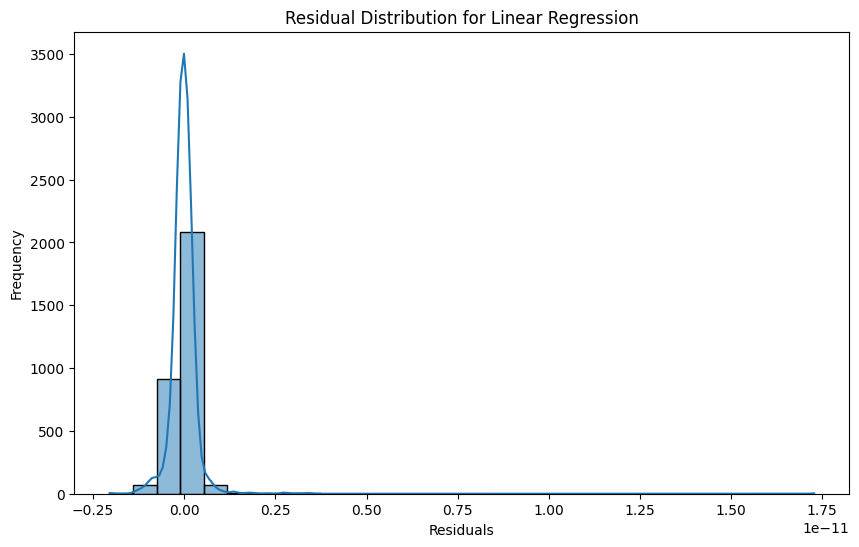

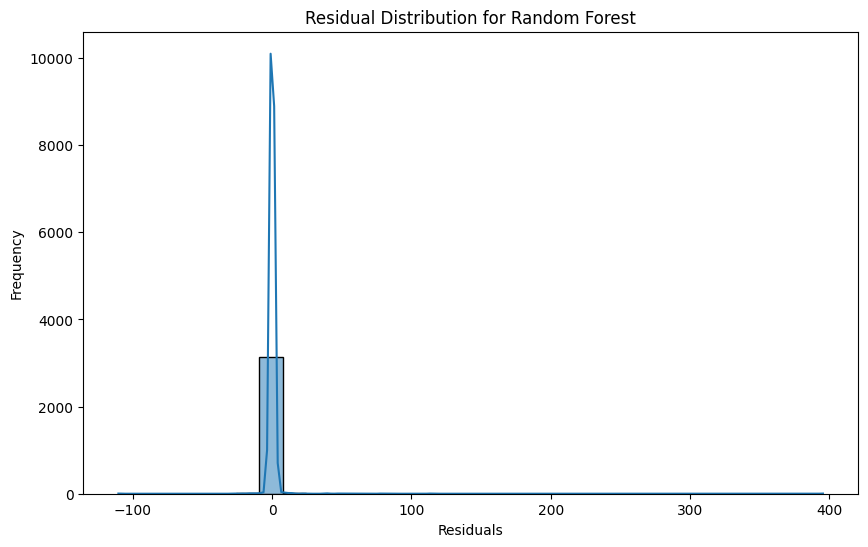

In [39]:
plot_residuals(y_test, y_pred_linear, "Linear Regression")
plot_residuals(y_test, y_pred_rf, "Random Forest")

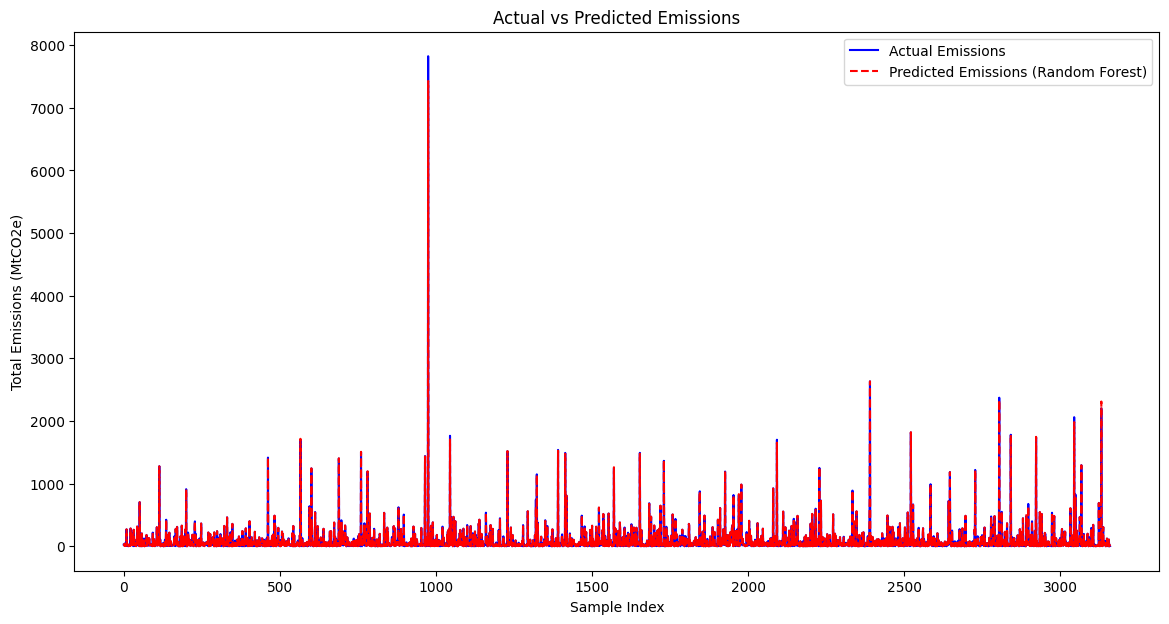

In [43]:
plt.figure(figsize=(14, 7))

plt.plot(y_test.values, label='Actual Emissions', color='blue')
plt.plot(y_pred_rf, label='Predicted Emissions (Random Forest)', color='red', linestyle='--')

plt.title('Actual vs Predicted Emissions')
plt.xlabel('Sample Index')
plt.ylabel('Total Emissions (MtCO2e)')
plt.legend()
plt.show()